# Tutorial 03

## Due Date :17-01-2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

## Question 01: 

* Write a programm for the Binomial tree value as a function of the number of time steps. 
* Test your code on a call option with parameters: $𝑆 = 100$, $𝐾 = 100$, $𝑇 = 1$, $𝑟 = 0.03$, $𝜎 = 0.35$ and $q=0.0$. 
* Plot a graph of your analysis. Include in your plot the analytical Black-Scholes value (To be computed).
* Follow the structure below and fill-in the gaps

In [2]:
Φ = lambda x: norm.cdf(x)

def BSCallprice(S, K, τ, σ, r):
  
    d1 = (np.log(S/K)+ (r + 0.5*σ**2)*τ)/(σ*np.sqrt(τ)) 
    d2 = d1 - σ*np.sqrt(τ)
    callprice = S*norm.cdf(d1) - K*np.exp(-r*τ)*norm.cdf(d2)
    
    return callprice


In [3]:
def binomialtree_europeancall(S0, K, T, vol, r, q, N):
    
    dt = T / N
    u = np.exp((r - q - 0.5 * vol**2) * dt + vol * np.sqrt(dt))
    d = np.exp((r - q - 0.5 * vol**2) * dt - vol * np.sqrt(dt))  
    p = (np.exp(r * dt) - d) / (u - d)
    
    Stree = np.zeros((N+1, N+1))
    Vtree = np.zeros_like(Stree)
    Stree[0,0] = S0
    
    for i in range(N+1):
        for j in range(i+1):
            if j == 0:
                Stree[i,j] = S0 * (d**(i - j)) * (u**j)
            else:
                Stree[i,j] = Stree[i-1,j-1] * u
    
    for i in range(N+1):
        for j in range(i+1):
            Vtree[i,j] = max(0, Stree[i,j] - K)
        
    for i in range((N-1), -1, -1):
        for j in range(i+1):
            Vtree[i,j] = (p * Vtree[i+1,j] + 
                         (1-p) * Vtree[i+1,j+1]) / np.exp(r * dt)
            
    return Stree, Vtree, Vtree[0,0]
            
    return Stree, Vtree, Vtree[0,0]



In [4]:

S0 = 100
K = 100
    
r = 0.03
q = 0.0
T = 1.0
N = 5
vol = 0.35

In [5]:
Nvec = np.arange(2,100,1)
callvec = np.zeros(len(Nvec))

BSPrice = BSCallprice(S0, K, T, vol, r)

for i in range(len(Nvec)):
    Smat, Vmat, call = binomialtree_europeancall(S0, K, T, vol, r, q, Nvec[i])
    callvec[i] = call
    

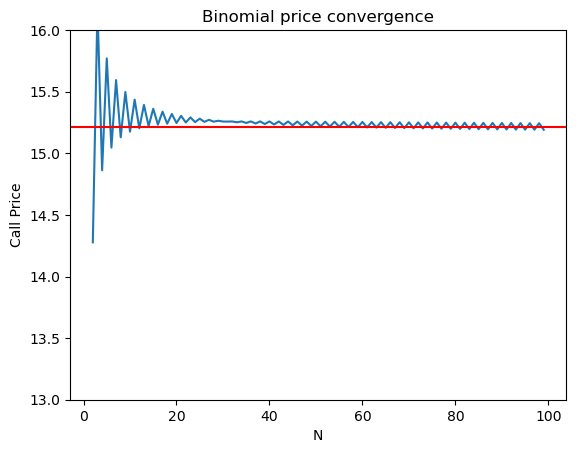

In [7]:
plt.plot(Nvec, callvec, label='Binomial')
plt.axhline(y = BSPrice, color = 'r', label = 'BS Price')
plt.xlabel("N")
plt.ylabel("Call Price")
plt.title('Binomial price convergence')
plt.ylim(13,16)
plt.show()

### Conclusion